In [1475]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1476]:
# 팀별 승리 수 파일과 점수 및 타율 파일 들고오기
vicFile=r'2001~2022까지 각 구단별 승리 수.xlsx'
scoreFile=r'2001~2022까지 각 구단별 타율과 득점 수.xlsx'


In [1477]:
vicDf=pd.read_excel(vicFile)
vicDf.set_index(keys='연도',inplace=True)

In [1478]:
vicDf

,2001,경기,승,패,무,타율,평균자책점,승률
연도,,,,,,,,
2001,두산 베어스,133,65,63,5,0.276,4.96,0.508
2001,삼성 라이온즈,133,81,52,0,0.277,4.39,0.609
2001,현대 유니콘스,133,72,57,4,0.268,4.34,0.558
2001,한화 이글스,133,61,68,4,0.275,4.82,0.473
2001,KIA 타이거즈,133,60,68,5,0.278,5.01,0.469
...,...,...,...,...,...,...,...,...
2022,삼성 라이온즈,144,66,76,2,0.27,4.29,0.465
2022,롯데 자이언츠,144,64,76,4,0.267,4.45,0.457
2022,두산 베어스,144,60,82,2,0.255,4.45,0.423


In [1479]:
scrDf=pd.read_excel(scoreFile)
scrDf.set_index(keys='연도',inplace=True)

In [1480]:
scrDf

,순위,팀명,AVG,G,PA,AB,R,H,2B,3B,...,SF,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH
연도,,,,,,,,,,,,,,,,,,,,,
2001,1,롯데,0.28,133,5308,4521,718,1265,247,24,...,60,585,39,60,817,89,0.425,0.365,0.79,133
2001,2,KIA,0.278,133,5189,4542,683,1263,221,17,...,43,497,21,56,774,129,0.428,0.353,0.781,133
2001,3,삼성,0.277,133,5280,4553,739,1262,244,21,...,42,520,27,95,814,111,0.447,0.36,0.807,133
2001,4,두산,0.276,133,5303,4583,732,1266,221,26,...,46,560,27,60,697,116,0.421,0.359,0.78,133
2001,5,LG,0.276,133,5319,4521,669,1247,219,24,...,41,590,24,52,759,100,0.391,0.363,0.754,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,7,SSG,0.254,144,5642,4893,720,1245,242,18,...,47,530,22,95,1075,96,0.396,0.336,0.732,143
2022,8,KT,0.254,144,5547,4864,631,1237,192,19,...,44,519,21,49,1183,105,0.375,0.33,0.705,144
2022,9,키움,0.252,144,5655,4953,621,1250,203,33,...,34,527,26,92,1032,89,0.364,0.333,0.697,143


In [1481]:
# 두 파일 병합 하려 각 행의 숫자를 봄 => 같음
print(vicDf.info(),scrDf.info(),sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 2001 to 2022
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2001    237 non-null    object
 1   경기      237 non-null    object
 2   승       237 non-null    object
 3   패       237 non-null    object
 4   무       237 non-null    object
 5   타율      237 non-null    object
 6   평균자책점   237 non-null    object
 7   승률      237 non-null    object
dtypes: object(8)
memory usage: 16.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 2001 to 2022
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      237 non-null    object
 1   팀명      215 non-null    object
 2   AVG     237 non-null    object
 3   G       237 non-null    object
 4   PA      237 non-null    object
 5   AB      237 non-null    object
 6   R       237 non-null    object
 7   H       237 non-null    object
 8   2B      237 non-n

In [1482]:
# 승리 파일에서 이름 간단히 한거 열 추가 해야함
name={'두산 베어스' : '두산','삼성 라이온즈' : '삼성','현대 유니콘스' : '현대','우리 히어로즈': '우리','넥센 히어로즈' : '넥센','키움 히어로즈' : '키움','KIA 타이거즈' : 'KIA','LG 트윈스' : 'LG','SK 와이번스' :'SK','SSG 랜더스' : 'SSG','롯데 자이언츠' : '롯데','한화 이글스': '한화','NC 다이노스': 'NC','KT 위즈':'KT','히어로즈':'히어로즈'}


In [1483]:
# 열 추가 하기 위해 함수 생성
def crossName(x):
    if x in name.keys():
        return name.get(x)


In [1484]:
vicDf['이름']=vicDf[2001].apply(crossName)

In [1485]:
vicDf=vicDf.drop(labels=[2001,'경기','패','무','타율','평균자책점','승률'],axis=1)

In [1486]:
vicDf                                                 

,승,이름
연도,,
2001,65,두산
2001,81,삼성
2001,72,현대
2001,61,한화
2001,60,KIA
...,...,...
2022,66,삼성
2022,64,롯데
2022,60,두산


In [1487]:
vicDf.head(20)

,승,이름
연도,,
2001,65,두산
2001,81,삼성
2001,72,현대
2001,61,한화
2001,60,KIA
2001,58,LG
2001,60,SK
2001,59,롯데
2001,516,None


In [1488]:
scrDf.head(20)

,순위,팀명,AVG,G,PA,AB,R,H,2B,3B,...,SF,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH
연도,,,,,,,,,,,,,,,,,,,,,
2001,1,롯데,0.28,133,5308,4521,718,1265,247,24,...,60,585,39,60,817,89,0.425,0.365,0.79,133
2001,2,KIA,0.278,133,5189,4542,683,1263,221,17,...,43,497,21,56,774,129,0.428,0.353,0.781,133
2001,3,삼성,0.277,133,5280,4553,739,1262,244,21,...,42,520,27,95,814,111,0.447,0.36,0.807,133
2001,4,두산,0.276,133,5303,4583,732,1266,221,26,...,46,560,27,60,697,116,0.421,0.359,0.78,133
2001,5,LG,0.276,133,5319,4521,669,1247,219,24,...,41,590,24,52,759,100,0.391,0.363,0.754,133
2001,6,한화,0.275,133,5259,4556,659,1255,211,15,...,34,549,28,45,877,106,0.426,0.357,0.783,133
2001,7,현대,0.268,133,5225,4445,711,1192,166,20,...,29,598,14,76,911,109,0.429,0.362,0.791,133
2001,8,SK,0.26,133,5077,4400,596,1143,215,11,...,26,457,23,71,770,95,0.391,0.337,0.728,133
2001,합계,NaN,0.274,532,41960,36121,5507,9893,1744,158,...,321,4356,203,515,6419,855,0.42,0.357,0.777,1064


In [1489]:
# nan 데이터 None으로 바꿈
scrDf.fillna('None',inplace=True)
scrDf.replace('팀명','None',inplace=True)
scrDf.head(10)


,순위,팀명,AVG,G,PA,AB,R,H,2B,3B,...,SF,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH
연도,,,,,,,,,,,,,,,,,,,,,
2001,1,롯데,0.28,133,5308,4521,718,1265,247,24,...,60,585,39,60,817,89,0.425,0.365,0.79,133
2001,2,KIA,0.278,133,5189,4542,683,1263,221,17,...,43,497,21,56,774,129,0.428,0.353,0.781,133
2001,3,삼성,0.277,133,5280,4553,739,1262,244,21,...,42,520,27,95,814,111,0.447,0.36,0.807,133
2001,4,두산,0.276,133,5303,4583,732,1266,221,26,...,46,560,27,60,697,116,0.421,0.359,0.78,133
2001,5,LG,0.276,133,5319,4521,669,1247,219,24,...,41,590,24,52,759,100,0.391,0.363,0.754,133
2001,6,한화,0.275,133,5259,4556,659,1255,211,15,...,34,549,28,45,877,106,0.426,0.357,0.783,133
2001,7,현대,0.268,133,5225,4445,711,1192,166,20,...,29,598,14,76,911,109,0.429,0.362,0.791,133
2001,8,SK,0.26,133,5077,4400,596,1143,215,11,...,26,457,23,71,770,95,0.391,0.337,0.728,133
2001,합계,None,0.274,532,41960,36121,5507,9893,1744,158,...,321,4356,203,515,6419,855,0.42,0.357,0.777,1064


In [1490]:
vicDf.fillna('None',inplace=True)

In [1491]:
scrDf.isna().sum().sum()

0

In [1492]:
vicDf.reset_index(inplace=True)

In [1493]:
# 불린 인덱스로 팀명에 None 없는 것만 골라 온다
mask1=vicDf['이름']!='None'
vicDf=vicDf[mask1]
vicDf

,연도,승,이름
0,2001,65,두산
1,2001,81,삼성
2,2001,72,현대
3,2001,61,한화
4,2001,60,KIA
...,...,...,...
231,2022,67,NC
232,2022,66,삼성
233,2022,64,롯데
234,2022,60,두산


In [1494]:
mask2=scrDf['팀명']!='None'
scrDf=scrDf[mask2]
scrDf

,순위,팀명,AVG,G,PA,AB,R,H,2B,3B,...,SF,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH
연도,,,,,,,,,,,,,,,,,,,,,
2001,1,롯데,0.28,133,5308,4521,718,1265,247,24,...,60,585,39,60,817,89,0.425,0.365,0.79,133
2001,2,KIA,0.278,133,5189,4542,683,1263,221,17,...,43,497,21,56,774,129,0.428,0.353,0.781,133
2001,3,삼성,0.277,133,5280,4553,739,1262,244,21,...,42,520,27,95,814,111,0.447,0.36,0.807,133
2001,4,두산,0.276,133,5303,4583,732,1266,221,26,...,46,560,27,60,697,116,0.421,0.359,0.78,133
2001,5,LG,0.276,133,5319,4521,669,1247,219,24,...,41,590,24,52,759,100,0.391,0.363,0.754,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,6,두산,0.255,144,5510,4891,638,1249,210,12,...,45,450,16,71,1007,116,0.365,0.324,0.689,144
2022,7,SSG,0.254,144,5642,4893,720,1245,242,18,...,47,530,22,95,1075,96,0.396,0.336,0.732,143
2022,8,KT,0.254,144,5547,4864,631,1237,192,19,...,44,519,21,49,1183,105,0.375,0.33,0.705,144


In [1495]:
vicDf=vicDf.set_index(['연도','이름'])
vicDf

승
연도   이름     
2001 두산   65
     삼성   81
     현대   72
     한화   61
     KIA  60
...       ..
2022 NC   67
     삼성   66
     롯데   64
     두산   60
     한화   46

[194 rows x 1 columns]

In [1496]:
scrDf.reset_index(inplace=True)
scrDf=scrDf.set_index(['연도','팀명'])
scrDf

순위    AVG    G    PA    AB    R     H   2B  3B   HR  ...  SF   BB  \
연도   팀명                                                        ...            
2001 롯데    1   0.28  133  5308  4521  718  1265  247  24  121  ...  60  585   
     KIA   2  0.278  133  5189  4542  683  1263  221  17  142  ...  43  497   
     삼성    3  0.277  133  5280  4553  739  1262  244  21  162  ...  42  520   
     두산    4  0.276  133  5303  4583  732  1266  221  26  130  ...  46  560   
     LG    5  0.276  133  5319  4521  669  1247  219  24   85  ...  41  590   
...       ..    ...  ...   ...   ...  ...   ...  ...  ..  ...  ...  ..  ...   
2022 두산    6  0.255  144  5510  4891  638  1249  210  12  101  ...  45  450   
     SSG   7  0.254  144  5642  4893  720  1245  242  18  138  ...  47  530   
     KT    8  0.254  144  5547  4864  631  1237  192  19  119  ...  44  519   
     키움    9  0.252  144  5655  4953  621  1250  203  33   94  ...  34  527   
     한화   10  0.245  144  5513  4878  564  1196  217  19   88  ...  40  497   

         IBB HBP    SO  GDP    SLG    OBP    OPS   MH  
연도   팀명                                                
2001 롯데   39  60   817   89  0.425  0.365   0.79  133  
     KIA  21  56   774  129  0.428  0.353  0.781  133  
     삼성   27  95   814  111  0.447   0.36  0.807  133  
     두산   27  60   697  116  0.421  0.359   0.78  133  
     LG   24  52   759  100  0.391  0.363  0.754  133  
...       ..  ..   ...  ...    ...    ...    ...  ...  
2022 두산   16  71  1007  116  0.365  0.324  0.689  144  
     SSG  22  95  1075   96  0.396  0.336  0.732  143  
     KT   21  49  1183  105  0.375   0.33  0.705  144  
     키움   26  92  1032   89  0.364  0.333  0.697  143  
     한화   13  52  1264   92  0.352  0.319  0.671  144  

[194 rows x 23 columns]

In [1497]:
# 두 데이터 합치기 위해서 인덱스 정렬
vicDf.sort_index(level=1,inplace=True)
vicDf

,,승
연도,이름,
2001,KIA,60
2002,KIA,78
2003,KIA,78
2004,KIA,67
2005,KIA,49
...,...,...
2004,현대,75
2005,현대,53
2006,현대,70


In [1498]:
scrDf.sort_index(level=1,inplace=True)
scrDf

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,SF,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH
연도,팀명,,,,,,,,,,,,,,,,,,,,,
2001,KIA,2,0.278,133,5189,4542,683,1263,221,17,142,...,43,497,21,56,774,129,0.428,0.353,0.781,133
2002,KIA,3,0.269,133,5200,4575,643,1230,220,14,120,...,35,454,32,91,914,107,0.402,0.344,0.746,133
2003,KIA,4,0.272,133,5127,4448,657,1211,219,16,129,...,37,505,18,42,721,72,0.416,0.349,0.765,131
2004,KIA,6,0.267,133,5190,4426,643,1182,224,9,143,...,54,549,22,79,693,118,0.419,0.354,0.773,132
2005,KIA,5,0.26,126,4848,4234,541,1102,183,13,99,...,31,430,24,74,718,101,0.38,0.337,0.717,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,1,0.275,133,5322,4480,692,1233,190,13,134,...,38,607,29,86,871,109,0.413,0.37,0.783,133
2005,현대,7,0.256,126,4899,4190,563,1071,168,16,134,...,26,458,12,120,817,85,0.399,0.344,0.743,125
2006,현대,1,0.27,126,4798,4092,547,1104,172,9,92,...,32,444,17,77,628,108,0.384,0.35,0.734,126


In [1499]:
# 데이터 합치기
df_concat=pd.concat([scrDf,vicDf],axis=1)
df_concat

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,BB,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH,승
연도,,,,,,,,,,,,,,,,,,,,,,
2001,KIA,2,0.278,133,5189,4542,683,1263,221,17,142,...,497,21,56,774,129,0.428,0.353,0.781,133,60
2002,KIA,3,0.269,133,5200,4575,643,1230,220,14,120,...,454,32,91,914,107,0.402,0.344,0.746,133,78
2003,KIA,4,0.272,133,5127,4448,657,1211,219,16,129,...,505,18,42,721,72,0.416,0.349,0.765,131,78
2004,KIA,6,0.267,133,5190,4426,643,1182,224,9,143,...,549,22,79,693,118,0.419,0.354,0.773,132,67
2005,KIA,5,0.26,126,4848,4234,541,1102,183,13,99,...,430,24,74,718,101,0.38,0.337,0.717,125,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,1,0.275,133,5322,4480,692,1233,190,13,134,...,607,29,86,871,109,0.413,0.37,0.783,133,75
2005,현대,7,0.256,126,4899,4190,563,1071,168,16,134,...,458,12,120,817,85,0.399,0.344,0.743,125,53
2006,현대,1,0.27,126,4798,4092,547,1104,172,9,92,...,444,17,77,628,108,0.384,0.35,0.734,126,70


In [1500]:
# rc열 추가
df_concat['RC']=df_concat['OBP']*df_concat['SLG']
df_concat

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH,승,RC
연도,,,,,,,,,,,,,,,,,,,,,,
2001,KIA,2,0.278,133,5189,4542,683,1263,221,17,142,...,21,56,774,129,0.428,0.353,0.781,133,60,0.151084
2002,KIA,3,0.269,133,5200,4575,643,1230,220,14,120,...,32,91,914,107,0.402,0.344,0.746,133,78,0.138288
2003,KIA,4,0.272,133,5127,4448,657,1211,219,16,129,...,18,42,721,72,0.416,0.349,0.765,131,78,0.145184
2004,KIA,6,0.267,133,5190,4426,643,1182,224,9,143,...,22,79,693,118,0.419,0.354,0.773,132,67,0.148326
2005,KIA,5,0.26,126,4848,4234,541,1102,183,13,99,...,24,74,718,101,0.38,0.337,0.717,125,49,0.12806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,1,0.275,133,5322,4480,692,1233,190,13,134,...,29,86,871,109,0.413,0.37,0.783,133,75,0.15281
2005,현대,7,0.256,126,4899,4190,563,1071,168,16,134,...,12,120,817,85,0.399,0.344,0.743,125,53,0.137256
2006,현대,1,0.27,126,4798,4092,547,1104,172,9,92,...,17,77,628,108,0.384,0.35,0.734,126,70,0.1344


In [1501]:
# 그래프 그리기 위해서 object를 float으로 변경
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 194 entries, (2001, 'KIA') to (2009, '히어로즈')
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      194 non-null    object
 1   AVG     194 non-null    object
 2   G       194 non-null    object
 3   PA      194 non-null    object
 4   AB      194 non-null    object
 5   R       194 non-null    object
 6   H       194 non-null    object
 7   2B      194 non-null    object
 8   3B      194 non-null    object
 9   HR      194 non-null    object
 10  TB      194 non-null    object
 11  RBI     194 non-null    object
 12  SAC     194 non-null    object
 13  SF      194 non-null    object
 14  BB      194 non-null    object
 15  IBB     194 non-null    object
 16  HBP     194 non-null    object
 17  SO      194 non-null    object
 18  GDP     194 non-null    object
 19  SLG     194 non-null    object
 20  OBP     194 non-null    object
 21  OPS     194 non-null    object
 22  MH 

In [1502]:
# corr과 그래프 그리기 위해 타입변환
df_concat=df_concat.astype(float)

In [1503]:
df_concat=df_concat.rename(columns={'승':'win'})

<Axes: xlabel='R', ylabel='win'>

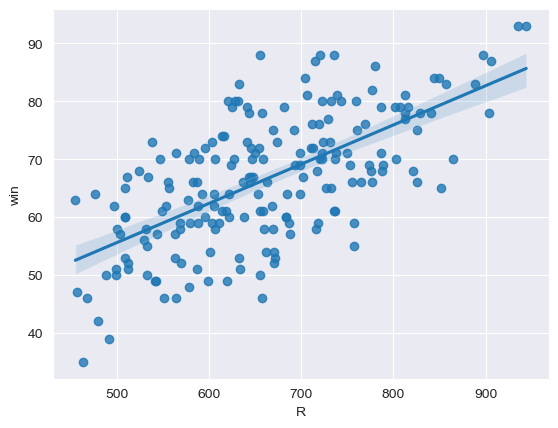

In [1504]:
# 승리 수와 득점(r)의 상관관계 그래프 그리기
sns.set_style('darkgrid')
sns.regplot(x='R',y='win',data=df_concat)


In [1505]:
df_concat.corr()
# r avg 0.822150
# r obp 0.773980
# r ops 0.876360
# r rc 0.877036

,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,IBB,HBP,SO,GDP,SLG,OBP,OPS,MH,win,RC
순위,1.000000,-0.586816,0.157532,-0.017074,0.021620,-0.330615,-0.291617,-0.211944,-0.145332,-0.149269,...,-0.264540,-0.039909,0.420819,-0.139448,-0.396930,-0.545821,-0.466311,0.142462,-0.465220,-0.473316
AVG,-0.586816,1.000000,0.243909,0.483352,0.455202,0.822150,0.816794,0.684418,0.317298,0.567165,...,0.072344,0.207385,0.013987,0.344387,0.838601,0.853298,0.889941,0.260850,0.526602,0.893322
G,0.157532,0.243909,1.000000,0.947891,0.957807,0.607666,0.746096,0.592876,0.087705,0.409907,...,0.006687,0.228515,0.747635,0.395092,0.264963,0.123787,0.234870,0.996228,0.315665,0.231116
PA,-0.017074,0.483352,0.947891,1.000000,0.976384,0.794145,0.883016,0.710968,0.163032,0.532754,...,0.095655,0.285330,0.680623,0.442233,0.470868,0.400904,0.474853,0.947603,0.441997,0.474074
AB,0.021620,0.455202,0.957807,0.976384,1.000000,0.740073,0.884530,0.723311,0.175692,0.507622,...,0.025762,0.233501,0.708835,0.436293,0.438754,0.271271,0.409978,0.959600,0.365903,0.406582
R,-0.330615,0.822150,0.607666,0.794145,0.740073,1.000000,0.908289,0.784377,0.281657,0.770687,...,0.115016,0.361177,0.388114,0.367783,0.854333,0.773980,0.876360,0.612494,0.647876,0.877036
H,-0.291617,0.816794,0.746096,0.883016,0.884530,0.908289,1.000000,0.828073,0.279133,0.626409,...,0.053457,0.260667,0.464906,0.462973,0.722669,0.618572,0.729827,0.755433,0.512318,0.729611
2B,-0.211944,0.684418,0.592876,0.710968,0.723311,0.784377,0.828073,1.000000,0.209992,0.556905,...,0.024864,0.201826,0.433429,0.335457,0.688074,0.503752,0.667826,0.596022,0.398369,0.667441
3B,-0.145332,0.317298,0.087705,0.163032,0.175692,0.281657,0.279133,0.209992,1.000000,-0.025983,...,-0.077748,0.053177,0.004824,-0.084301,0.190330,0.215218,0.208828,0.101723,0.212961,0.215364
HR,-0.149269,0.567165,0.409907,0.532754,0.507622,0.770687,0.626409,0.556905,-0.025983,1.000000,...,0.120508,0.409534,0.360765,0.211804,0.898968,0.524290,0.829999,0.412946,0.441145,0.819821


Text(800, 0.14, '0.877036')

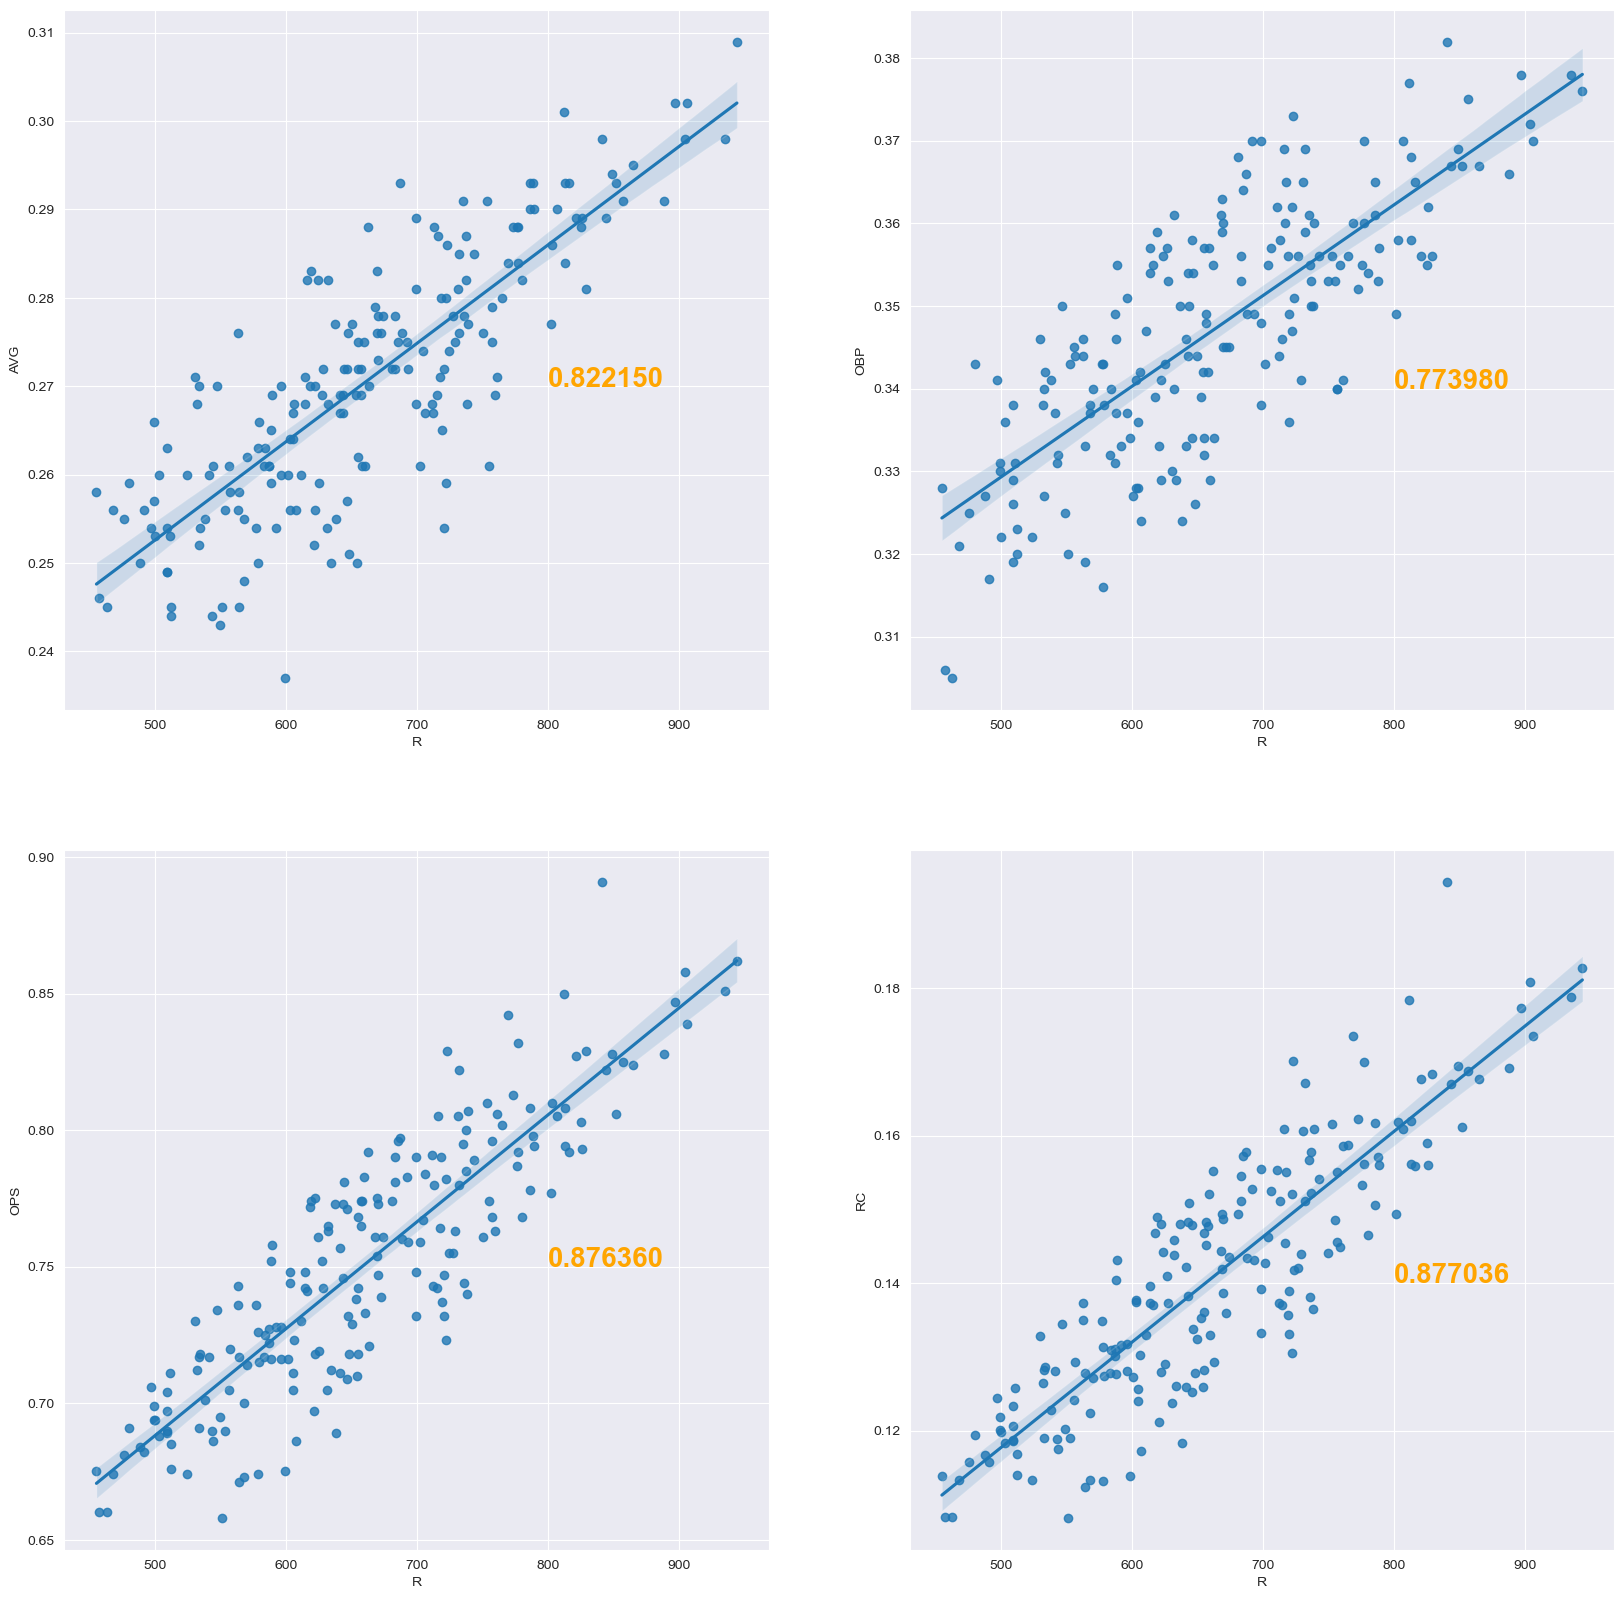

In [1506]:
# 득점(r)과  AVG(타율), OBP(출루율), OPS(출루율+장타율),RC(출루율*장타율) 사이의 상관관계
fig2=plt.figure(figsize=(20,20))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)

sns.regplot(x='R',y='AVG',data=df_concat,ax=ax1,)

sns.regplot(x='R',y='OBP',data=df_concat,ax=ax2)
sns.regplot(x='R',y='OPS',data=df_concat,ax=ax3)
sns.regplot(x='R',y='RC',data=df_concat,ax=ax4)
ax1.annotate('0.822150',xy=(800, 0.27), fontsize=20, fontweight='bold', color='orange')
ax2.annotate('0.773980',xy=(800, 0.34), fontsize=20, fontweight='bold', color='orange')
ax3.annotate('0.876360',xy=(800, 0.75), fontsize=20, fontweight='bold', color='orange')
ax4.annotate('0.877036',xy=(800, 0.14), fontsize=20, fontweight='bold', color='orange')


In [1507]:
# 위 결과를 보면 득점과 가장 관련이 있는 데이터는 RC라는 것을 알 수 있다

In [1508]:
# 승리수와 RC가 정말 관련있는지 비교해야 한다!!!!
df_concat.set_index('win',append=True,inplace=True)

In [1509]:
df_concat=df_concat.sort_index(level=[0,2],ascending=[True,False])

In [1510]:
df_concat.head(50)

순위    AVG      G      PA      AB      R       H     2B    3B  \
연도       win                                                                   
2001 삼성  81.0  3.0  0.277  133.0  5280.0  4553.0  739.0  1262.0  244.0  21.0   
     현대  72.0  7.0  0.268  133.0  5225.0  4445.0  711.0  1192.0  166.0  20.0   
     두산  65.0  4.0  0.276  133.0  5303.0  4583.0  732.0  1266.0  221.0  26.0   
     한화  61.0  6.0  0.275  133.0  5259.0  4556.0  659.0  1255.0  211.0  15.0   
     KIA 60.0  2.0  0.278  133.0  5189.0  4542.0  683.0  1263.0  221.0  17.0   
     SK  60.0  8.0  0.260  133.0  5077.0  4400.0  596.0  1143.0  215.0  11.0   
     롯데  59.0  1.0  0.280  133.0  5308.0  4521.0  718.0  1265.0  247.0  24.0   
     LG  58.0  5.0  0.276  133.0  5319.0  4521.0  669.0  1247.0  219.0  24.0   
2002 삼성  82.0  1.0  0.284  133.0  5304.0  4648.0  777.0  1321.0  266.0  16.0   
     KIA 78.0  3.0  0.269  133.0  5200.0  4575.0  643.0  1230.0  220.0  14.0   
     현대  70.0  5.0  0.261  133.0  5140.0  4444.0  658.0  1160.0  191.0  25.0   
     LG  66.0  4.0  0.261  133.0  5121.0  4492.0  583.0  1173.0  212.0  22.0   
     두산  66.0  6.0  0.261  133.0  5083.0  4498.0  587.0  1173.0  174.0  21.0   
     SK  61.0  2.0  0.270  133.0  5090.0  4475.0  618.0  1207.0  204.0  27.0   
     한화  59.0  7.0  0.256  133.0  5062.0  4491.0  603.0  1148.0  206.0  10.0   
     롯데  35.0  8.0  0.245  133.0  4986.0  4512.0  463.0  1105.0  206.0  19.0   
2003 현대  80.0  1.0  0.286  133.0  5313.0  4483.0  723.0  1280.0  208.0  15.0   
     KIA 78.0  4.0  0.272  133.0  5127.0  4448.0  657.0  1211.0  219.0  16.0   
     삼성  76.0  2.0  0.284  133.0  5241.0  4564.0  769.0  1295.0  236.0  14.0   
     SK  66.0  5.0  0.272  133.0  5157.0  4445.0  644.0  1208.0  209.0  16.0   
     한화  63.0  7.0  0.254  133.0  5198.0  4458.0  577.0  1131.0  218.0  20.0   
     LG  60.0  8.0  0.249  133.0  4964.0  4375.0  509.0  1088.0  188.0  29.0   
     두산  57.0  3.0  0.276  133.0  5165.0  4536.0  563.0  1251.0  205.0  21.0   
     롯데  39.0  6.0  0.256  133.0  4987.0  4465.0  491.0  1143.0  232.0  18.0   
2004 현대  75.0  1.0  0.275  133.0  5322.0  4480.0  692.0  1233.0  190.0  13.0   
     삼성  73.0  3.0  0.269  133.0  5170.0  4509.0  641.0  1215.0  225.0   9.0   
     두산  70.0  5.0  0.268  133.0  5109.0  4485.0  606.0  1200.0  202.0  19.0   
     KIA 67.0  6.0  0.267  133.0  5190.0  4426.0  643.0  1182.0  224.0   9.0   
     SK  61.0  2.0  0.272  133.0  5254.0  4499.0  655.0  1223.0  196.0   9.0   
     LG  59.0  7.0  0.259  133.0  5081.0  4432.0  588.0  1150.0  176.0  24.0   
     한화  53.0  4.0  0.268  133.0  5150.0  4519.0  632.0  1213.0  245.0  17.0   
     롯데  50.0  8.0  0.252  133.0  5075.0  4462.0  533.0  1125.0  195.0  21.0   
2005 삼성  74.0  4.0  0.268  126.0  4975.0  4234.0  614.0  1134.0  178.0   6.0   
     두산  72.0  2.0  0.270  126.0  4922.0  4256.0  596.0  1147.0  183.0  17.0   
     SK  70.0  3.0  0.269  126.0  4984.0  4230.0  589.0  1139.0  174.0  12.0   
     한화  64.0  1.0  0.270  126.0  4841.0  4304.0  622.0  1163.0  211.0   9.0   
     롯데  58.0  8.0  0.253  126.0  4722.0  4177.0  500.0  1058.0  202.0  23.0   
     LG  54.0  6.0  0.260  126.0  4785.0  4222.0  601.0  1098.0  189.0  21.0   
     현대  53.0  7.0  0.256  126.0  4899.0  4190.0  563.0  1071.0  168.0  16.0   
     KIA 49.0  5.0  0.260  126.0  4848.0  4234.0  541.0  1102.0  183.0  13.0   
2006 삼성  73.0  4.0  0.255  126.0  4779.0  4091.0  538.0  1043.0  192.0   9.0   
     현대  70.0  1.0  0.270  126.0  4798.0  4092.0  547.0  1104.0  172.0   9.0   
     한화  67.0  6.0  0.253  126.0  4769.0  4170.0  511.0  1057.0  191.0   3.0   
     KIA 64.0  3.0  0.255  126.0  4754.0  4181.0  476.0  1067.0  191.0  22.0   
     두산  63.0  2.0  0.258  126.0  4708.0  4147.0  455.0  1068.0  152.0  28.0   
     SK  60.0  5.0  0.254  126.0  4793.0  4177.0  509.0  1059.0  171.0  19.0   
     롯데  50.0  7.0  0.250  126.0  4766.0  4137.0  488.0  1034.0  173.0   3.0   
     LG  47.0  8.0  0.246  126.0  4724.0  4217.0  457.0  1037.0  181.0  16.0   
2007 SK  73.0  4

In [1511]:
df_concat.tail(50)

순위    AVG      G      PA      AB      R       H     2B    3B  \
연도       win                                                                    
2018 두산  93.0   1.0  0.309  144.0  5870.0  5176.0  944.0  1601.0  284.0  30.0   
     SK  78.0   7.0  0.281  144.0  5682.0  4992.0  829.0  1403.0  234.0  13.0   
     한화  77.0   8.0  0.275  144.0  5539.0  4972.0  729.0  1369.0  249.0  14.0   
     넥센  75.0   5.0  0.288  144.0  5780.0  5141.0  825.0  1481.0  288.0  19.0   
     KIA 70.0   2.0  0.295  144.0  5744.0  5036.0  865.0  1487.0  258.0  22.0   
     LG  68.0   3.0  0.293  144.0  5665.0  5070.0  788.0  1487.0  299.0  12.0   
     롯데  68.0   4.0  0.289  144.0  5764.0  5130.0  821.0  1484.0  289.0  17.0   
     삼성  68.0   6.0  0.288  144.0  5766.0  5109.0  776.0  1471.0  241.0  29.0   
     KT  59.0   9.0  0.275  144.0  5605.0  5026.0  757.0  1382.0  264.0  13.0   
     NC  58.0  10.0  0.261  144.0  5488.0  4895.0  660.0  1280.0  233.0  18.0   
2019 SK  88.0   7.0  0.262  144.0  5542.0  4919.0  655.0  1290.0  218.0  14.0   
     두산  88.0   3.0  0.278  144.0  5670.0  4913.0  736.0  1364.0  235.0  31.0   
     키움  86.0   1.0  0.282  144.0  5658.0  4991.0  780.0  1405.0  251.0  38.0   
     LG  79.0   5.0  0.267  144.0  5536.0  4928.0  641.0  1316.0  233.0  15.0   
     NC  73.0   2.0  0.278  144.0  5631.0  4968.0  674.0  1383.0  249.0  26.0   
     KT  71.0   4.0  0.277  144.0  5582.0  4965.0  650.0  1375.0  187.0  20.0   
     KIA 62.0   6.0  0.264  144.0  5505.0  4874.0  605.0  1286.0  248.0  19.0   
     삼성  60.0   9.0  0.256  144.0  5533.0  4866.0  622.0  1245.0  230.0  26.0   
     한화  58.0   8.0  0.256  144.0  5482.0  4882.0  607.0  1250.0  223.0  16.0   
     롯데  48.0  10.0  0.250  144.0  5488.0  4919.0  578.0  1231.0  214.0  22.0   
2020 NC  83.0   2.0  0.291  144.0  5833.0  5102.0  888.0  1483.0  258.0  28.0   
     KT  81.0   3.0  0.284  144.0  5762.0  5047.0  813.0  1432.0  238.0  21.0   
     키움  80.0   7.0  0.269  144.0  5721.0  4945.0  759.0  1332.0  254.0  25.0   
     LG  79.0   4.0  0.277  144.0  5681.0  4999.0  802.0  1384.0  253.0  29.0   
     두산  79.0   1.0  0.293  144.0  5776.0  5046.0  816.0  1477.0  263.0  20.0   
     KIA 73.0   6.0  0.274  144.0  5642.0  4937.0  724.0  1355.0  224.0  13.0   
     롯데  71.0   5.0  0.276  144.0  5669.0  4958.0  750.0  1366.0  252.0   6.0   
     삼성  64.0   8.0  0.268  144.0  5574.0  4923.0  699.0  1317.0  211.0  12.0   
     SK  51.0   9.0  0.250  144.0  5502.0  4839.0  634.0  1212.0  177.0  17.0   
     한화  46.0  10.0  0.245  144.0  5483.0  4862.0  551.0  1189.0  195.0  12.0   
2021 KT  76.0   4.0  0.265  144.0  5627.0  4810.0  719.0  1276.0  219.0  11.0   
     삼성  76.0   3.0  0.267  144.0  5552.0  4836.0  712.0  1292.0  204.0  18.0   
     LG  72.0   8.0  0.250  144.0  5533.0  4750.0  654.0  1188.0  210.0  11.0   
     두산  71.0   2.0  0.268  144.0  5645.0  4900.0  738.0  1314.0  235.0  17.0   
     키움  70.0   7.0  0.259  144.0  5653.0  4874.0  722.0  1262.0  244.0  28.0   
     NC  67.0   6.0  0.261  144.0  5532.0  4808.0  702.0  1254.0  203.0  17.0   
     SSG 66.0   5.0  0.261  144.0  5736.0  4899.0  755.0  1278.0  204.0  13.0   
     롯데  65.0   1.0  0.278  144.0  5726.0  5009.0  727.0  1393.0  266.0  10.0   
     KIA 58.0   9.0  0.248  144.0  5577.0  4831.0  568.0  1198.0  183.0  21.0   
     한화  49.0  10.0  0.237  144.0  5495.0  4685.0  599.0  1111.0  213.0  17.0   
2022 SSG 88.0   7.0  0.254  144.0  5642.0  4893.0  720.0  1245.0  242.0  18.0   
     LG  87.0   3.0  0.269  144.0  5627.0  4927.0  715.0  1325.0  208.0  33.0   
     KT  80.0   8.0  0.254  144.0  5547.0  4864.0  631.0  1237.0  192.0  19.0   
     키움  80.0   9.0  0.252  144.0  5655.0  4953.0  621.0  1250.0  203.0  33.0   
     KIA 70.0   1.0  0.272  144.0  5703.0  5000.0  720.0  1361.0  250.0  19.0   
     NC  67.0   5.0  0.257  144.0  5585.0  4899.0  646.0  1260.0  230.0  15.0   
     삼성  66.0   2.0  0.270  144.0  5647.0  5023.0  663.0  1358.0  241.0  19.0   
     롯데  64.0   4.0  0.267  144.0  5534.0  4948.

In [1512]:
# 정말 승리수와 rc가 상관이 있는지 확인

df_concat.xs(2001,level='연도').index[0]

('삼성', 81.0)

In [1513]:
df_concat.xs(2001,level='연도').sort_values('RC',ascending=False).index[0]

('삼성', 81.0)

In [1514]:

def winRC(): # rc가 가장 높은 팀이 플레이오프 진출할(5등 이상 할) 확률
    count=0
    for i in range(2001,2023):

        if df_concat.xs(i,level='연도').sort_values('RC',ascending=False).index[0] in [df_concat.xs(i,level='연도').index[0],df_concat.xs(i,level='연도').index[1],df_concat.xs(i,level='연도').index[2],df_concat.xs(i,level='연도').index[3],df_concat.xs(i,level='연도').index[4]]:
            count+=1
            
    return print(count)


In [1515]:
winRC()

21


In [1516]:
# 22번의 년도 중 rc가 가장 높은 팀이 플레이오프 진출할(5등이상) 확률
21/22 # 95.4퍼센트
# 결론 : rc와 승률은 정말 상관이 있다!

0.9545454545454546

In [1517]:
# 이제 투수에 관해서 확인 해 보자
# 위의 자료로 승리와 득점은 관계가 있다는걸 알게 되었다
# 이번엔 득실 차를 이용하면 득점과 실점이 승리수와 관련이 있는지 알아 볼 수 있다
# 논문에 의하면 실점(r)과 가장 관련 있는 요소는 흔이 알고있는 방어률(평균자책점 ERA) 이닝당 출루허용률(WHIP)
# 를 승률과 상괸관계를 알아보자

In [1518]:
file3=r'2001~2022까지 각 구단별 투수.xlsx'
pitcher=pd.read_excel(file3)
pitcher.set_index(keys='연도',inplace=True)

# nan 데이터 None으로 바꿈
pitcher.fillna('None',inplace=True)
pitcher.replace('팀명','None',inplace=True)

# 불린 인덱스로 팀명에 none 없는것만 골라 온다
mask3=pitcher['팀명']!='None'
pitcher=pitcher[mask3]

# 연도랑 팀명을 멀티 인덱스로 잡는다
pitcher.reset_index(inplace=True)
pitcher=pitcher.set_index(['연도','팀명'])

# 실점을 득점과 혼동 피하기 위해 이름rr로 추가
pitcher['RR']=pitcher['R']
pitcher=pitcher.drop('R',axis=1)
pitcher


순위   ERA    G   W   L  SV HLD   WPCT           IP     H   HR   BB  \
연도   팀명                                                                       
2001 현대    1  4.34  133  72  57  39  23  0.558  1183.333333  1250   98  531   
     SK    2  4.38  133  60  71  33  22  0.458  1171.333333  1148  155  508   
     삼성    3  4.39  133  81  52  43  20  0.609  1187.333333  1195  132  561   
     롯데    4  4.68  133  59  70  33  28  0.457  1171.666667  1238  128  523   
     한화    5  4.82  133  61  68  25  33  0.473         1185  1288  142  541   
...       ..   ...  ...  ..  ..  ..  ..    ...          ...   ...  ...  ...   
2022 KIA   6   4.2  144  70  73  38  74   0.49  1279.666667  1286  120  526   
     삼성    7  4.29  144  66  76  34  71  0.465         1287  1370  129  478   
     두산    8  4.45  144  60  82  32  68  0.423  1279.333333  1336  117  555   
     롯데    9  4.45  144  64  76  34  69  0.457  1280.666667  1373   84  492   
     한화   10  4.83  144  46  96  25  81  0.324  1268.333333  1314  112  602   

         HBP    SO   ER  WHIP   RR  
연도   팀명                             
2001 현대   54   757  570  1.51  628  
     SK   65   908  570  1.41  640  
     삼성   61   844  579  1.48  644  
     롯데   61   790  609   1.5  670  
     한화   66   813  634  1.54  733  
...       ..   ...  ...   ...  ...  
2022 KIA  67  1042  597  1.42  679  
     삼성   66   971  613  1.44  695  
     두산   70   977  632  1.48  721  
     롯데   80  1199  633  1.46  712  
     한화   83   974  680  1.51  759  

[194 rows x 17 columns]

In [1519]:
# 데이터 합치기 위해 정렬
pitcher.sort_index(level=1,inplace=True)
pitcher

,,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,ER,WHIP,RR
연도,팀명,,,,,,,,,,,,,,,,,
2001,KIA,7,5.01,133,60,68,28,16,0.469,1178.666667,1231,160,499,79,743,656,1.47,727
2002,KIA,2,3.92,133,78,51,38,30,0.605,1195,1185,151,370,97,862,520,1.3,580
2003,KIA,1,3.62,133,78,50,36,34,0.609,1178,1092,137,414,101,820,474,1.28,527
2004,KIA,7,4.51,133,67,61,27,24,0.523,1183,1198,119,496,120,773,593,1.43,637
2005,KIA,7,4.81,126,49,76,24,26,0.392,1105,1166,138,510,119,786,591,1.52,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,3,4.06,133,75,53,36,32,0.586,1187,1193,123,440,59,842,535,1.38,590
2005,현대,6,4.68,126,53,70,28,22,0.431,1115.666667,1175,125,422,80,803,580,1.43,647
2006,현대,5,3.41,126,70,55,41,45,0.56,1114.666667,1053,69,394,71,816,422,1.3,467


In [1520]:
# 데이터 합치기
df_concat2=pd.concat([scrDf,pitcher],axis=1)
df_concat2

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,WPCT,IP,H,HR,BB,HBP,SO,ER,WHIP,RR
연도,팀명,,,,,,,,,,,,,,,,,,,,,
2001,KIA,2,0.278,133,5189,4542,683,1263,221,17,142,...,0.469,1178.666667,1231,160,499,79,743,656,1.47,727
2002,KIA,3,0.269,133,5200,4575,643,1230,220,14,120,...,0.605,1195,1185,151,370,97,862,520,1.3,580
2003,KIA,4,0.272,133,5127,4448,657,1211,219,16,129,...,0.609,1178,1092,137,414,101,820,474,1.28,527
2004,KIA,6,0.267,133,5190,4426,643,1182,224,9,143,...,0.523,1183,1198,119,496,120,773,593,1.43,637
2005,KIA,5,0.26,126,4848,4234,541,1102,183,13,99,...,0.392,1105,1166,138,510,119,786,591,1.52,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,1,0.275,133,5322,4480,692,1233,190,13,134,...,0.586,1187,1193,123,440,59,842,535,1.38,590
2005,현대,7,0.256,126,4899,4190,563,1071,168,16,134,...,0.431,1115.666667,1175,125,422,80,803,580,1.43,647
2006,현대,1,0.27,126,4798,4092,547,1104,172,9,92,...,0.56,1114.666667,1053,69,394,71,816,422,1.3,467


In [1521]:
# 득실 차를 열로 추가
df_concat2['R-RR']=df_concat2['R']-df_concat2['RR']
df_concat2

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,IP,H,HR,BB,HBP,SO,ER,WHIP,RR,R-RR
연도,팀명,,,,,,,,,,,,,,,,,,,,,
2001,KIA,2,0.278,133,5189,4542,683,1263,221,17,142,...,1178.666667,1231,160,499,79,743,656,1.47,727,-44
2002,KIA,3,0.269,133,5200,4575,643,1230,220,14,120,...,1195,1185,151,370,97,862,520,1.3,580,63
2003,KIA,4,0.272,133,5127,4448,657,1211,219,16,129,...,1178,1092,137,414,101,820,474,1.28,527,130
2004,KIA,6,0.267,133,5190,4426,643,1182,224,9,143,...,1183,1198,119,496,120,773,593,1.43,637,6
2005,KIA,5,0.26,126,4848,4234,541,1102,183,13,99,...,1105,1166,138,510,119,786,591,1.52,659,-118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,현대,1,0.275,133,5322,4480,692,1233,190,13,134,...,1187,1193,123,440,59,842,535,1.38,590,102
2005,현대,7,0.256,126,4899,4190,563,1071,168,16,134,...,1115.666667,1175,125,422,80,803,580,1.43,647,-84
2006,현대,1,0.27,126,4798,4092,547,1104,172,9,92,...,1114.666667,1053,69,394,71,816,422,1.3,467,80


In [1522]:
# 득실 차와 승리수의 상관관계 그래프 그리기
df_concat2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 194 entries, (2001, 'KIA') to (2009, '히어로즈')
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      194 non-null    object
 1   AVG     194 non-null    object
 2   G       194 non-null    object
 3   PA      194 non-null    object
 4   AB      194 non-null    object
 5   R       194 non-null    object
 6   H       194 non-null    object
 7   2B      194 non-null    object
 8   3B      194 non-null    object
 9   HR      194 non-null    object
 10  TB      194 non-null    object
 11  RBI     194 non-null    object
 12  SAC     194 non-null    object
 13  SF      194 non-null    object
 14  BB      194 non-null    object
 15  IBB     194 non-null    object
 16  HBP     194 non-null    object
 17  SO      194 non-null    object
 18  GDP     194 non-null    object
 19  SLG     194 non-null    object
 20  OBP     194 non-null    object
 21  OPS     194 non-null    object
 22  MH 

In [1523]:
# corr과 그래프 그리기 위해 타입변환
df_concat2=df_concat2.astype(float)

<Axes: xlabel='R-RR', ylabel='W'>

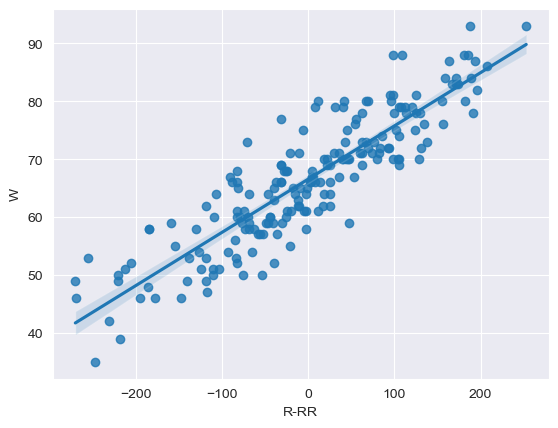

In [1524]:
# 승리 수와 득실차(r-rr)의 상관관계 그래프 그리기
sns.set_style('darkgrid')
sns.regplot(x='R-RR',y='W',data=df_concat2)

In [1525]:
df_concat2.corr()

,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,IP,H,HR,BB,HBP,SO,ER,WHIP,RR,R-RR
순위,1.000000,-0.586816,1.575318e-01,-0.017074,0.021620,-0.330615,-0.291617,-0.211944,-0.145332,-0.149269,...,0.104760,0.192157,0.117985,0.290395,0.186242,0.053103,0.261788,0.283280,0.275000,-6.013559e-01
AVG,-0.586816,1.000000,2.439085e-01,0.483352,0.455202,0.822150,0.816794,0.684418,0.317298,0.567165,...,0.278073,0.445849,0.399901,-0.105890,0.050624,0.294154,0.361117,0.213347,0.344712,4.730488e-01
G,0.157532,0.243909,1.000000e+00,0.947891,0.957807,0.607666,0.746096,0.592876,0.087705,0.409907,...,0.987183,0.745241,0.481335,0.319643,0.244007,0.781774,0.593596,0.235385,0.606543,8.253863e-16
PA,-0.017074,0.483352,9.478912e-01,1.000000,0.976384,0.794145,0.883016,0.710968,0.163032,0.532754,...,0.957952,0.771826,0.534313,0.299073,0.225297,0.781797,0.626332,0.275905,0.633937,1.577820e-01
AB,0.021620,0.455202,9.578074e-01,0.976384,1.000000,0.740073,0.884530,0.723311,0.175692,0.507622,...,0.961034,0.815538,0.552913,0.254792,0.259121,0.764330,0.656620,0.295735,0.666250,7.201731e-02
R,-0.330615,0.822150,6.076663e-01,0.794145,0.740073,1.000000,0.908289,0.784377,0.281657,0.770687,...,0.636140,0.616834,0.549362,0.094893,0.111639,0.595276,0.501644,0.239198,0.492980,5.021251e-01
H,-0.291617,0.816794,7.460964e-01,0.883016,0.884530,0.908289,1.000000,0.828073,0.279133,0.626409,...,0.766418,0.761317,0.567341,0.102892,0.198452,0.645599,0.612899,0.299901,0.609947,2.948741e-01
2B,-0.211944,0.684418,5.928759e-01,0.710968,0.723311,0.784377,0.828073,1.000000,0.209992,0.556905,...,0.601782,0.646495,0.540006,0.061716,0.226537,0.531829,0.541652,0.279604,0.538155,2.432960e-01
3B,-0.145332,0.317298,8.770514e-02,0.163032,0.175692,0.281657,0.279133,0.209992,1.000000,-0.025983,...,0.111018,0.143682,-0.041419,-0.039447,0.012445,0.010274,0.060936,0.058775,0.047995,2.317355e-01
HR,-0.149269,0.567165,4.099071e-01,0.532754,0.507622,0.770687,0.626409,0.556905,-0.025983,1.000000,...,0.423462,0.479451,0.664828,0.049588,0.129694,0.444515,0.439491,0.222523,0.431462,3.357639e-01


In [1526]:
# 위 그래프를 보면 득실차와 승리수와 매우 높은 상관관계를 볼 수 있다
# 그러므로 실점관련된 요소들을 알아보도록 한다


Text(800, 1.4, '0.845706')

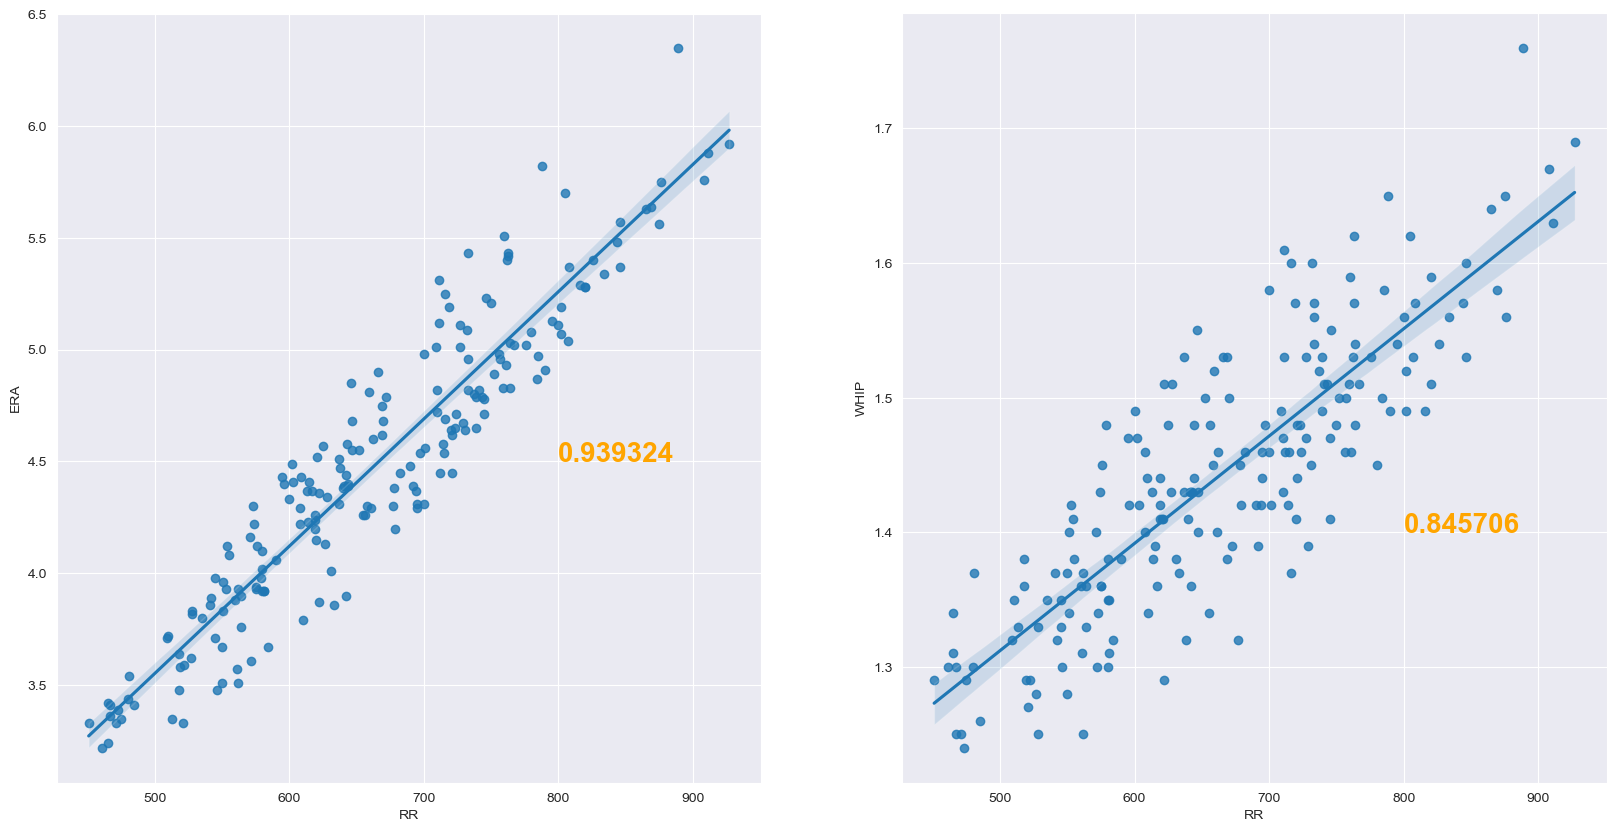

In [1527]:
# 실점(rr)과  방어율(ERA), 이닝당 출루허용률(WHIP) 사이의 상관관계
fig3=plt.figure(figsize=(20,10))
ax5=fig3.add_subplot(1,2,1)
ax6=fig3.add_subplot(1,2,2)


sns.regplot(x='RR',y='ERA',data=df_concat2,ax=ax5,)

sns.regplot(x='RR',y='WHIP',data=df_concat2,ax=ax6)

ax5.annotate('0.939324',xy=(800, 4.5), fontsize=20, fontweight='bold', color='orange')
ax6.annotate('0.845706',xy=(800, 1.4), fontsize=20, fontweight='bold', color='orange')


In [1528]:
# 정말로 승리수와 방어율(ERA)가 상관이 있는지 알아보자
# 득점에서 만든 함수를 이용하기 위해 W를 인덱스로 내리자
df_concat2.set_index('W',append=True,inplace=True)


In [1532]:
df_concat2=df_concat2.sort_index(level=[0,2],ascending=[True,False])

In [1533]:
df_concat2.xs(2001,level='연도')

,,순위,AVG,G,PA,AB,R,H,2B,3B,HR,...,IP,H,HR,BB,HBP,SO,ER,WHIP,RR,R-RR
팀명,W,,,,,,,,,,,,,,,,,,,,,
삼성,81.0,3.0,0.277,133.0,5280.0,4553.0,739.0,1262.0,244.0,21.0,162.0,...,1187.333333,1195.0,132.0,561.0,61.0,844.0,579.0,1.48,644.0,95.0
현대,72.0,7.0,0.268,133.0,5225.0,4445.0,711.0,1192.0,166.0,20.0,169.0,...,1183.333333,1250.0,98.0,531.0,54.0,757.0,570.0,1.51,628.0,83.0
두산,65.0,4.0,0.276,133.0,5303.0,4583.0,732.0,1266.0,221.0,26.0,130.0,...,1180.333333,1290.0,128.0,546.0,60.0,799.0,650.0,1.56,733.0,-1.0
한화,61.0,6.0,0.275,133.0,5259.0,4556.0,659.0,1255.0,211.0,15.0,148.0,...,1185.000000,1288.0,142.0,541.0,66.0,813.0,634.0,1.54,733.0,-74.0
KIA,60.0,2.0,0.278,133.0,5189.0,4542.0,683.0,1263.0,221.0,17.0,142.0,...,1178.666667,1231.0,160.0,499.0,79.0,743.0,656.0,1.47,727.0,-44.0
SK,60.0,8.0,0.260,133.0,5077.0,4400.0,596.0,1143.0,215.0,11.0,113.0,...,1171.333333,1148.0,155.0,508.0,65.0,908.0,570.0,1.41,640.0,-44.0
롯데,59.0,1.0,0.280,133.0,5308.0,4521.0,718.0,1265.0,247.0,24.0,121.0,...,1171.666667,1238.0,128.0,523.0,61.0,790.0,609.0,1.50,670.0,48.0
LG,58.0,5.0,0.276,133.0,5319.0,4521.0,669.0,1247.0,219.0,24.0,85.0,...,1184.666667,1253.0,127.0,647.0,69.0,765.0,670.0,1.60,732.0,-63.0


In [1530]:
df_concat2.xs(2001,level='연도').sort_values('ERA',ascending=True)['ERA']

팀명   W   
현대   72.0    4.34
SK   60.0    4.38
삼성   81.0    4.39
롯데   59.0    4.68
한화   61.0    4.82
두산   65.0    4.96
KIA  60.0    5.01
LG   58.0    5.09
Name: ERA, dtype: float64

In [1534]:
def winERA(): # 방어율이 가장 낮은 팀이 5등이상 할 확률
    count=0
    for i in range(2001,2023):

        if df_concat2.xs(i,level='연도').sort_values('ERA',ascending=True).index[0] in [df_concat2.xs(i,level='연도').index[0],df_concat2.xs(i,level='연도').index[1],df_concat2.xs(i,level='연도').index[2],df_concat2.xs(i,level='연도').index[3],df_concat2.xs(i,level='연도').index[4]]:
            count+=1
            
    return print(count)

In [1536]:
winERA()

21


In [1]:
# 22번의 년도 중 방어율(ERA)이 가장 낮은 팀이 플레이오프 진출할(5등이상) 확률
21/22 # 95.4퍼센트
# 결론 : ERA와 승률은 정말 상관이 있다!

0.9545454545454546

In [ ]:
# 20년치의 데이터를 기준으로 rc가 가장 높고 방어율이 가낭 낮은 팀이 플레이오프에 진출할 확률은
# 91 퍼센트로 나올 수 있다.                                                                                                                                                                                                                    